# Regression and Causal Models
This notebook contains my implementation of simple linear regression and linear ridge regresson. As well as a little exploration on Causal Models.

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
df = pd.read_csv('houses.csv')
df.head()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
0,221.9,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,62,0,1340,5650
1,538.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,66,40,1690,7639
2,180.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,84,0,2720,8062
3,604.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,52,0,1360,5000
4,510.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,30,0,1800,7503


In [3]:
df.describe()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [4]:
df.describe()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [5]:
dfY = df.loc[:, ['price (grands)']]
dfY.head()

,price (grands)
0,221.9
1,538.0
2,180.0
3,604.0
4,510.0


In [6]:
Y = np.reshape(np.array(dfY), len(dfY))
print(Y.shape)
print(Y[:2])

(21613,)
[ 221.9  538. ]


In [7]:
# normalize all values
tmp = df.values
mms = MinMaxScaler()
df2 = pd.DataFrame(mms.fit_transform(tmp), columns=df.columns, index=df.index)
df2.head()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.521739,0.000000,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.556522,0.350877,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.713043,0.000000,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.434783,0.000000,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.243478,0.000000,0.241094,0.007871


In [8]:
dfX = df2.loc[:, :].drop('price (grands)', axis=1)
dfX.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.521739,0.000000,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.556522,0.350877,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.713043,0.000000,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.434783,0.000000,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.243478,0.000000,0.241094,0.007871


In [9]:
X = np.array(dfX)
print(X.shape)
print(X[:2])

(21613, 15)
[[ 0.09090909  0.125       0.06716981  0.00310751  0.          0.          0.
   0.5         0.5         0.09758772  0.          0.52173913  0.
   0.16193426  0.00574235]
 [ 0.09090909  0.28125     0.17207547  0.00407187  0.4         0.          0.
   0.5         0.5         0.20614035  0.08298755  0.55652174  0.35087719
   0.22216486  0.00802712]]


In [10]:
dfX1 = df2.loc[:, ['sqft_living']]
dfX1.head()

,sqft_living
0,0.067170
1,0.172075
2,0.036226
3,0.126038
4,0.104906


In [11]:
X1 = np.array(dfX1)
print(X1.shape)
print(X1[:2])

(21613, 1)
[[ 0.06716981]
 [ 0.17207547]]


In [12]:
# separate function to predict with given params
def predict(x, params):
    out = 0
    for i in range(len(x)):
        out += x[i]*params[i]
    
    return out + params[-1]

# vectorize to work with np array
#vecPred = np.vectorize(predict, otypes=[np.float], excluded=[1])

In [13]:
# do linear regression which returns model parameters and loss per rep
def linear_regression(X, y, lr, reps):
    params = np.empty((reps, X.shape[1]+1))
    # initialize parameters randomly
    for i in range(reps):
        for j in range(X.shape[1] + 1):
            params[i][j] = 1 # random.uniform(0,1) # one for each feature and bias
        
    losses = np.empty(reps)
    # do many iterations
    for i in range(reps):
        
        preds = np.apply_along_axis(predict, 1, X, params[i]) # get predictions
        losses[i] = np.sum(np.square(preds-y))/len(preds) # calculate loss
        
        # update params in all but last iteration
        if i < reps - 1:
            for p in range(X.shape[1]):
                params[i+1][p] = params[i][p] - (lr*2*np.sum((preds-y)*(X[:,p]))/len(preds))
            params[i+1][-1] = params[i][-1] - (lr*2*np.sum(preds-y)/len(preds))
            
    return params, losses

In [14]:
params = {'X': {}, 'X1': {}}
losses = {'X': {}, 'X1': {}}

In [15]:
params['X'][10], losses['X'][10] = linear_regression(X, Y, 10, 1000)#10000)

/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


In [16]:
params['X1'][10], losses['X1'][10] = linear_regression(X1, Y, 10, 1000)#10000)

/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [17]:
params['X'][1], losses['X'][1] = linear_regression(X, Y, 1, 1000)#10000)

/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [18]:
params['X1'][1], losses['X1'][1] = linear_regression(X1, Y, 1, 1000)#10000)

In [19]:
params['X'][0.1], losses['X'][0.1] = linear_regression(X, Y, 0.1, 1000)#10000)

In [20]:
params['X1'][0.1], losses['X1'][0.1] = linear_regression(X1, Y, 0.1, 1000)#10000)

In [21]:
params['X'][0.01], losses['X'][0.01] = linear_regression(X, Y, 0.01, 1000)#10000)

In [22]:
params['X1'][0.01], losses['X1'][0.01] = linear_regression(X1, Y, 0.01, 1000)#10000)

In [23]:
params['X'][0.001], losses['X'][0.001] = linear_regression(X, Y, 0.001, 1000)#10000)

In [24]:
params['X1'][0.001], losses['X1'][0.001] = linear_regression(X1, Y, 0.001, 1000)#10000)

In [16]:
# save data so don't have to run it all again
import pickle as pkl
#pkl.dump(params, open('params.pkl', 'wb'))
#pkl.dump(losses, open('losses.pkl', 'wb'))

In [17]:
losses = pkl.load(open('losses.pkl', 'rb'))
params = pkl.load(open('params.pkl', 'rb'))

/home/amaral/anaconda2/envs/pods/lib/python2.7/site-packages/numpy/ma/core.py:6457: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


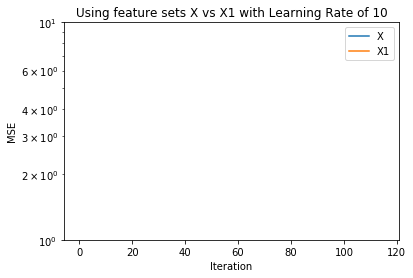

In [18]:
plt.plot(range(len(losses['X'][10])), losses['X'][10])
plt.plot(range(len(losses['X'][10])), losses['X1'][10])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 10')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

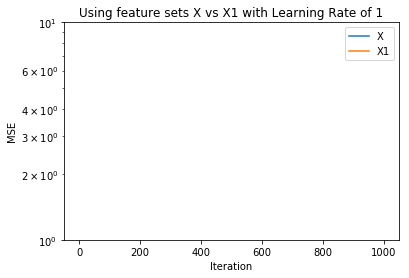

In [19]:
plt.plot(range(len(losses['X'][10])), losses['X'][1])
plt.plot(range(len(losses['X'][10])), losses['X1'][1])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 1')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

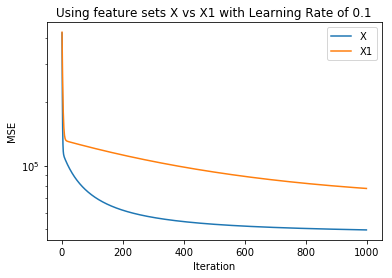

In [20]:
plt.plot(range(len(losses['X'][10])), losses['X'][.1])
plt.plot(range(len(losses['X'][10])), losses['X1'][.1])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 0.1')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

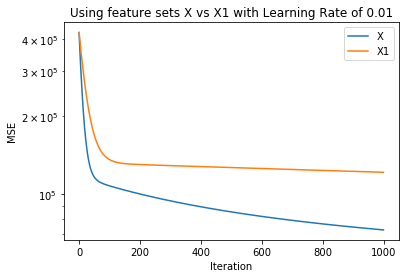

In [21]:
plt.plot(range(len(losses['X'][10])), losses['X'][.01])
plt.plot(range(len(losses['X'][10])), losses['X1'][.01])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 0.01')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

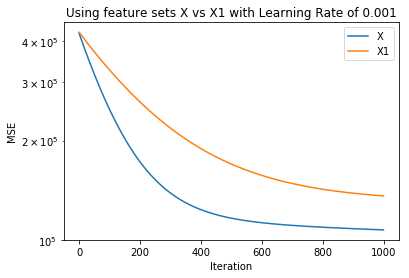

In [22]:
plt.plot(range(len(losses['X'][10])), losses['X'][.001])
plt.plot(range(len(losses['X'][10])), losses['X1'][.001])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 0.001')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

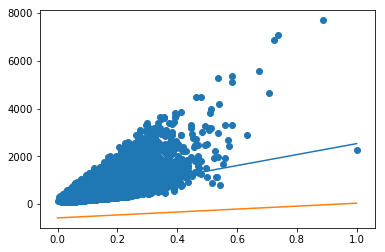

In [23]:
plt.scatter(np.array(df2.loc[:, ['sqft_living']]), 
           np.array(df.loc[:, ['price (grands)']]))
x = np.linspace(0.0, 1.0, 1000)
plt.plot(x, params['X1'][0.1][-1][0]*x + params['X1'][0.1][-1][1])
plt.plot(x, params['X'][0.1][-1][2]*x + params['X'][0.1][-1][-1])
plt.show()

The model with more features either has not converged yet due to higher complexity, or it may rely more on different features. The bias clearly throws it off significantly.

In [24]:
print(params['X1'][0.1][-1])
print(params['X'][0.1][-1])

[ 2298.79323145   230.46055964]
[ -40.83164878  395.59573283  616.38232678   -6.37803679  129.03571686
  425.35724538  258.20734842   48.43458147  822.64765251  667.17848838
  432.17593688  353.66451356   88.08568422  512.69762604  -39.30156387
 -584.17388761]


In [25]:
def linear_ridge_regression(X, y, lr, alpha, reps):
    params = np.empty((reps, X.shape[1]+1))
    # initialize parameters randomly
    for i in range(reps):
        for j in range(X.shape[1] + 1):
            params[i][j] = 1 # random.uniform(0,1) # one for each feature and bias
        
    losses = np.empty(reps)
    # do many iterations
    for i in range(reps):
        
        preds = np.apply_along_axis(predict, 1, X, params[i]) # get predictions
        losses[i] = np.sum(np.square(preds-y))/len(preds) # calculate loss
        
        # update params in all but last iteration
        if i < reps - 1:
            for p in range(X.shape[1]):
                params[i+1][p] = (1-2*lr*alpha)*params[i][p] - (lr*2*np.sum((preds-y)*(X[:,p]))/len(preds))
            params[i+1][-1] = (1-2*lr*alpha)*params[i][-1] - (lr*2*np.sum(preds-y)/len(preds))
            
    return params, losses

In [26]:
params['X'][0.55], losses['X'][0.55] = linear_ridge_regression(X, Y, 0.1, 0.55, 1000)#10000)

In [27]:
params['X1'][0.55], losses['X1'][0.55] = linear_ridge_regression(X1, Y, 0.1, 0.55, 1000)#10000)

In [28]:
params['X'][0.15], losses['X'][0.15] = linear_ridge_regression(X, Y, 0.1, 0.15, 1000)#10000)

In [29]:
params['X1'][0.15], losses['X1'][0.15] = linear_ridge_regression(X1, Y, 0.1, 0.15, 1000)#10000)

In [30]:
params['X'][0.015], losses['X'][0.015] = linear_ridge_regression(X, Y, 0.1, 0.015, 1000)#10000)

In [31]:
params['X1'][0.015], losses['X1'][0.015] = linear_ridge_regression(X1, Y, 0.1, 0.015, 1000)#10000)

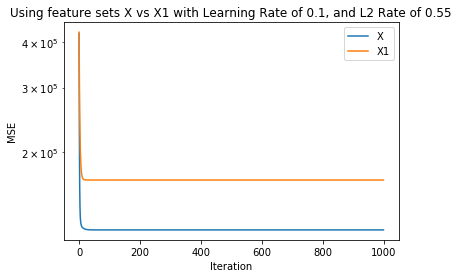

In [32]:
plt.plot(range(len(losses['X'][10])), losses['X'][.55])
plt.plot(range(len(losses['X'][10])), losses['X1'][.55])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 0.1, and L2 Rate of 0.55')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

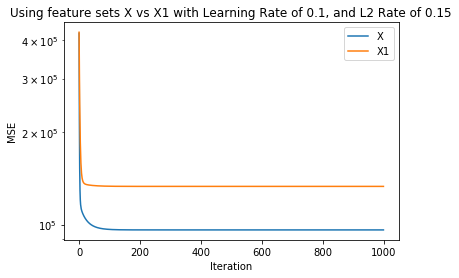

In [33]:
plt.plot(range(len(losses['X'][10])), losses['X'][.15])
plt.plot(range(len(losses['X'][10])), losses['X1'][.15])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 0.1, and L2 Rate of 0.15')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

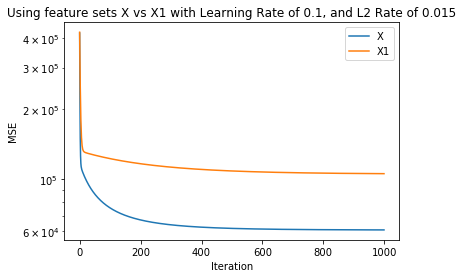

In [34]:
plt.plot(range(len(losses['X'][10])), losses['X'][.015])
plt.plot(range(len(losses['X'][10])), losses['X1'][.015])
plt.legend(['X', 'X1'])
plt.yscale('log')
plt.title('Using feature sets X vs X1 with Learning Rate of 0.1, and L2 Rate of 0.015')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

## Causal Modelling
Image of model used in causal-model.jpg. Values are from the assingment (not included.

In [30]:
from lea import Lea

In [31]:
alt = Lea.boolProb(999, 1000) # alternator working
fan = Lea.boolProb(98, 100) # fan belt working
fan.s
bc = Lea.buildCPT(
    (~alt & ~fan, Lea.boolProb(0, 1)),
    (~alt & fan, Lea.boolProb(0, 1)),
    (alt & ~fan, Lea.boolProb(0, 1)),
    (alt & fan, Lea.boolProb(995, 1000))) # battery charging
bnf = Lea.buildCPT(
    (~bc, Lea.boolProb(1, 10)),
    (bc, Lea.boolProb(9, 10))) # batery not flat
cs = Lea.buildCPT(
    (~bnf, Lea.boolProb(0, 1)),
    (bnf, Lea.boolProb(95, 100)))

In [32]:
print(~alt.given(~cs)) # alternator is broken given car won't start

False : 40940019/41166269
 True :   226250/41166269


In [33]:
print(~fan.given(~cs)) # fan belt is broken given that car won't start

False : 36641269/41166269
 True :  4525000/41166269


In [34]:
print(~fan.given(~cs&~alt)) # fan belt broken given car won't start and alternator broken

False : 49/50
 True :  1/50


In [35]:
print((~alt&~fan).given(~cs)) # alternator and fan belt broken given car won't start

False : 41161744/41166269
 True :     4525/41166269
